In [63]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np

import scikits.bootstrap as bootstrap
import scipy.stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import statsmodels.formula.api as smf

%matplotlib inline

In [ ]:
#Read file "data/company_data.csv" (beware the encoding) and print header

In [6]:
df = pd.read_csv("data/company_data.csv",encoding="iso-8859-1",sep="\t")
df.head()

,Company_name,Company_ID,Big3Share,Position,Exchange,TypeEnt,VAR,Dollars_th
0,INVESCO LTD,BM40671R,17.85,1,New York Stock Exchange (NYSE),Bank,Revenue,7500000.0
1,ROYAL CARIBBEAN CRUISES LTD,LR30002MX,14.32,3,New York Stock Exchange (NYSE),Industrial company,Revenue,7500000.0
2,GENCO SHIPPING & TRADING LTD,MH30004AQ,0.14,31,New York Stock Exchange (NYSE),Industrial company,Revenue,350000.0
3,EAGLE BULK SHIPPING INC,MH40003AQ,2.85,9,NASDAQ National Market,Industrial company,Revenue,350000.0
4,POWERSHARES DB US DOLLAR INDEX BEARISH,US*S00100679,0.00,101,NYSE ARCA,Industrial company,Revenue,NaN


In [ ]:
#Use df.describe() to see how it looks like. Why is dollars_th not there? (describe only describes numeric columns)

In [4]:
df.describe()

,Big3Share,Position
count,11646.000000,11646.000000
mean,10.323029,16.122875
std,7.950457,34.873495
min,0.000000,1.000000
25%,2.420000,1.000000
50%,10.365000,2.000000
75%,17.200000,8.000000
max,48.190000,165.000000


In [ ]:
#Sort the df by dollars_th to find out why this column is not numeric  (check ascenidng=False and ascending=True)

In [9]:
#Weird symbol
df.sort_values(by="Dollars_th",ascending=False).head()

,Company_name,Company_ID,Big3Share,Position,Exchange,TypeEnt,VAR,Dollars_th
7772,JOHN HANCOCK HEDGED EQUITY & INCOME FUND,US*S00138046,0.00,105,New York Stock Exchange (NYSE),Industrial company,MarketCap,`189761.0
9613,AGREE REALTY CORP,US383148187,24.10,1,New York Stock Exchange (NYSE),Financial company,MarketCap,999644.0
7948,"FIVE STAR QUALITY CARE, INC.",US043516029,8.78,1,New York Stock Exchange (NYSE),Industrial company,MarketCap,99933.0
2693,ELIZABETH ARDEN INC,US590914138,12.02,5,NASDAQ National Market,Industrial company,Revenue,999298.0
6082,"UNIQUE FABRICATING, INC.",US461846791,0.00,116,NYSE MKT,Industrial company,Assets,99921.0


In [ ]:
#Use df.replace() to replace the weird symbol `(you'll probably need the option regex=True)

In [10]:
df = df.replace("`","",regex=True)
df["Dollars_th"] = df["Dollars_th"].astype(float)

In [ ]:
#Pivot or Melt to tidy format

In [12]:
#Columns already present
variables_already_present = ["Company_name","Company_ID","Big3Share","Position","Exchange","TypeEnt"]

#Column with the variables
column_to_split = ["VAR"]

#Column with the values
column_with_values = "Dollars_th"

#Fix
df_fixed = df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index()

df_fixed.head()

VAR,Company_name,Company_ID,Big3Share,Position,Exchange,TypeEnt,Assets,MarketCap,Revenue
0,"1-800 FLOWERS.COM, INC.",US113117311,5.08,4,NASDAQ National Market,Industrial company,497073.0,289266.0,1121506.0
1,1347 PROPERTY INSURANCE HOLDINGS INC,US257638358L,0.00,120,NASDAQ National Market,Insurance company,NaN,42390.0,37500.0
2,"1ST CENTURY BANCSHARES, INC.",US261169687,0.00,122,NASDAQ National Market,Bank,64927.0,115050.0,2585.0
3,1ST CONSTITUTION BANCORP,US223665653,0.59,15,NASDAQ National Market,Bank,NaN,99595.0,37500.0
4,1ST SOURCE CORPORATION,US351068133,6.78,4,NASDAQ National Market,Bank,5187916.0,884045.0,249837.0


In [ ]:
#Merge with this other dataset ("data/employees.csv")

In [17]:
df_emp = pd.read_csv("data/employees.csv",sep="\t")

df_merged = pd.merge(df_emp,df_fixed)
df_merged.head()

,Company_ID,Employees,Company_name,Big3Share,Position,Exchange,TypeEnt,Assets,MarketCap,Revenue
0,BM40671R,7500.0,INVESCO LTD,17.85,1,New York Stock Exchange (NYSE),Bank,NaN,13123024.0,7500000.0
1,LR30002MX,7500.0,ROYAL CARIBBEAN CRUISES LTD,14.32,3,New York Stock Exchange (NYSE),Industrial company,NaN,16739323.0,7500000.0
2,MH30004AQ,1500.0,GENCO SHIPPING & TRADING LTD,0.14,31,New York Stock Exchange (NYSE),Industrial company,NaN,43392.0,350000.0
3,MH40003AQ,750.0,EAGLE BULK SHIPPING INC,2.85,9,NASDAQ National Market,Industrial company,NaN,26674.0,350000.0
4,US*S00100679,NaN,POWERSHARES DB US DOLLAR INDEX BEARISH,0.00,101,NYSE ARCA,Industrial company,NaN,44120.0,NaN


In [ ]:
#Check normality (qqplot and histogram)

In [18]:
def qq_plot(x):
    import scipy.stats
    (osm, osr),(slope, intercept, r)  = scipy.stats.probplot(x, dist='norm', plot=None)
    plt.plot(osm, osr, '.', osm, slope*osm + intercept)
    plt.xlabel('Quantiles',fontsize=14)
    plt.ylabel('Quantiles Obs',fontsize=14)  

In [20]:
emp = df_merged["Employees"]
rev = df_merged["Revenue"]
assets = df_merged["Assets"]
mark = df_merged["MarketCap"]
qq_plot(emp)
qq_plot(rev)
qq_plot(assets)
qq_plot(mark)

In [ ]:
#Transform variables to log

In [47]:
df_merged["log_Employees"] = np.log10(df_merged["Employees"])
df_merged["log_Revenue"] = np.log10(df_merged["Revenue"])
df_merged["log_Assets"] = np.log10(df_merged["Assets"])
df_merged["log_MarketCap"] = np.log10(df_merged["MarketCap"])

df_merged = df_merged.replace([np.inf,-np.inf],np.nan).dropna()

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


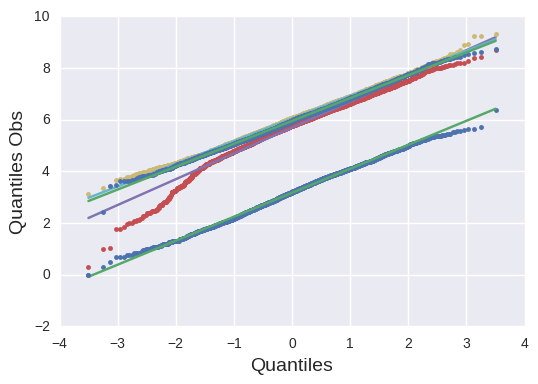

In [48]:
emp = df_merged["log_Employees"]
rev = df_merged["log_Revenue"]
assets = df_merged["log_Assets"]
mark = df_merged["log_MarketCap"]
qq_plot(emp)
qq_plot(rev)
qq_plot(assets)
qq_plot(mark)

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


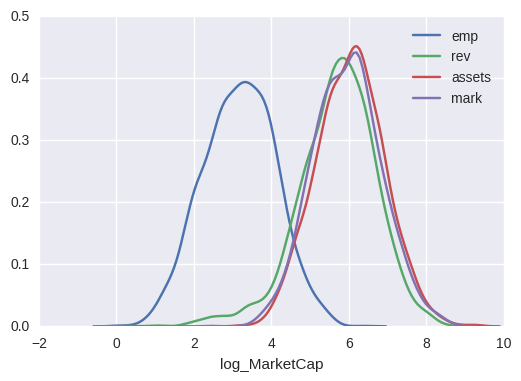

In [49]:
sns.distplot(emp.dropna(),hist=False,label='emp')
sns.distplot(rev.dropna(),hist=False,label="rev")
sns.distplot(assets.dropna(),hist=False,label="assets")
sns.distplot(mark.dropna(),hist=False,label="mark")

In [ ]:
#create 4 subsets (rows with position=1,position=2,position=3,position>3)

In [51]:
pos1 = df_merged.loc[df_merged["Position"]==1,"log_MarketCap"]
pos2 = df_merged.loc[df_merged["Position"]==2,"log_MarketCap"]
pos3 = df_merged.loc[df_merged["Position"]==3,"log_MarketCap"]
pos4 = df_merged.loc[df_merged["Position"]>3,"log_MarketCap"]

In [ ]:
#calculate the confidence intervals of the subsets

In [52]:
print(bootstrap.ci(pos1, statfunction=np.mean,n_samples=100000))
print(bootstrap.ci(pos2, statfunction=np.mean,n_samples=100000) )
print(bootstrap.ci(pos3, statfunction=np.mean,n_samples=100000) )
print(bootstrap.ci(pos4, statfunction=np.mean,n_samples=100000))

[ 6.39021132  6.46088479]
[ 5.88630393  6.06001343]
[ 5.75614305  5.94732321]
[ 5.22997249  5.32225272]


In [ ]:
#Do the right test (anova/kruskalwallis). If same variance (or very similar) do tukey test

In [54]:
scipy.stats.levene(pos1,pos2,pos3,pos4)

LeveneResult(statistic=1.5035880086352347, pvalue=0.21156579598082711)

In [55]:
scipy.stats.f_oneway(pos1,pos2,pos3,pos4)

F_onewayResult(statistic=504.51127896305786, pvalue=1.4725733756146336e-265)

In [60]:
df_merged.loc[df["Position"]>3 , "Position"] = 3

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.4544  -0.5656 -0.3432  True 
  1      3    -1.0356  -1.1021 -0.9691  True 
  2      3    -0.5812  -0.6939 -0.4684  True 
---------------------------------------------


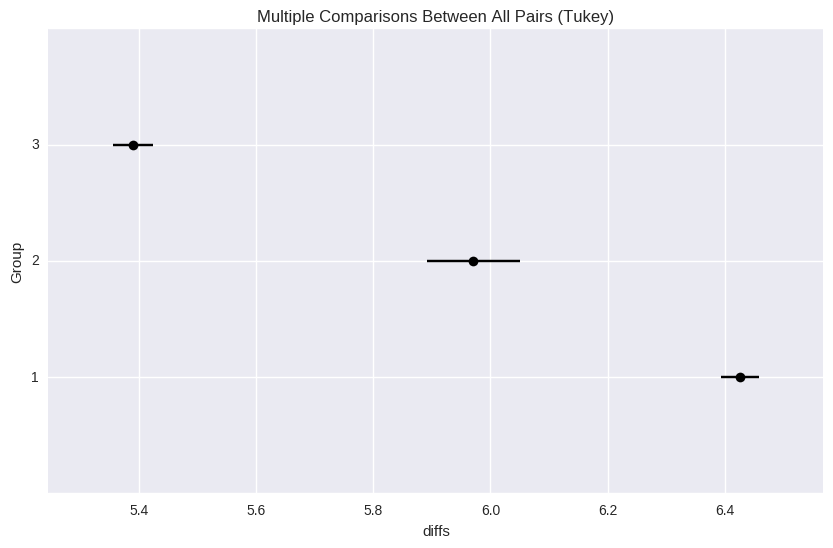

In [61]:
#Plot tukey test
res2 = pairwise_tukeyhsd(df_merged["log_MarketCap"],df_merged["Position"])
print(res2)
res2.plot_simultaneous(comparison_name=None,xlabel='diffs',ylabel='Group')
plt.show()

In [ ]:
#Make a scatter plot of x = assets and y = market capitalization with hue = Type of ent

(-2, 10)

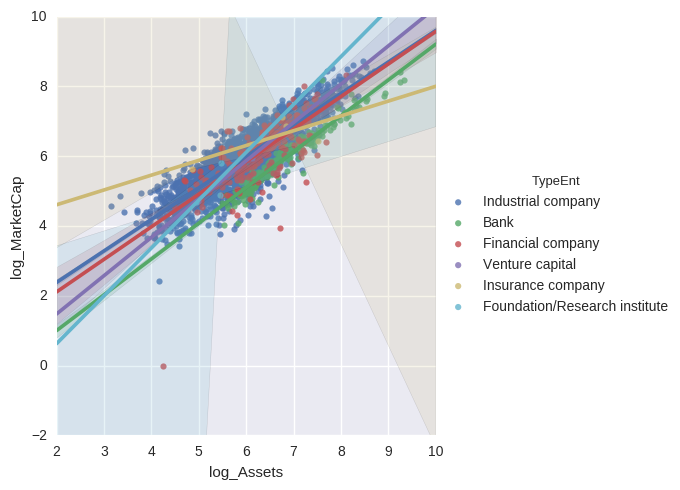

In [76]:
sns.lmplot(x="log_Assets",y="log_MarketCap",hue="TypeEnt",data=df_merged)
plt.ylim((-2,10))

In [ ]:
#Run a liner regression explaining market capitalization in terms of the assets and  
#the type of entity column.

In [66]:
#How to run a regression (be careful, this is wrong)
mod = smf.ols(formula='log_MarketCap ~ log_Assets + C(TypeEnt)', data=df_merged)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          log_MarketCap   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1623.
Date:                Thu, 02 Feb 2017   Prob (F-statistic):               0.00
Time:                        02:00:10   Log-Likelihood:                -1734.6
No. Observations:                3013   AIC:                             3483.
Df Residuals:                    3006   BIC:                             3525.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------

In [ ]:
#Check the assumptions of the regression

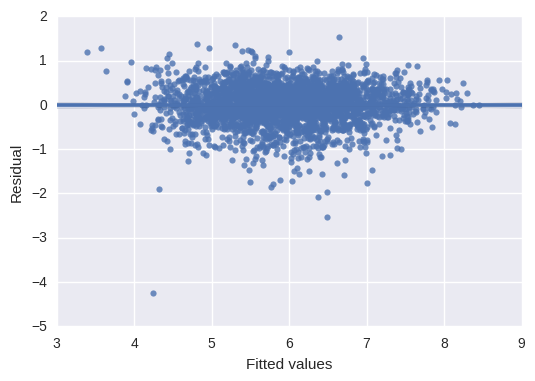

In [67]:
#Shape of residuals
sns.regplot(res.predict(),res.resid)
plt.ylabel('Residual')
plt.xlabel('Fitted values')


(-3, 3)

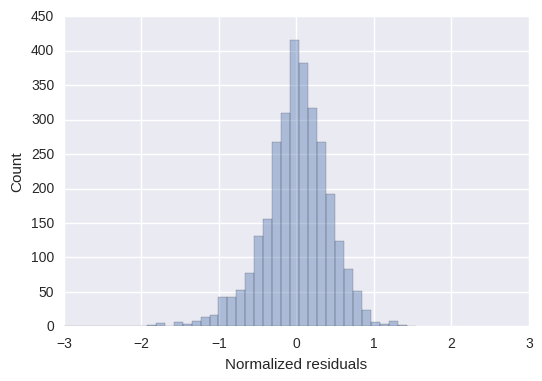

In [68]:
#Normality
sns.distplot(res.resid,kde=False)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.xlim((-3,3))

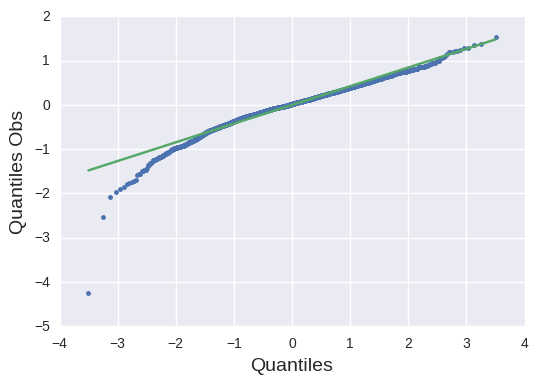

In [69]:
#Normality 2
qq_plot(res.resid)

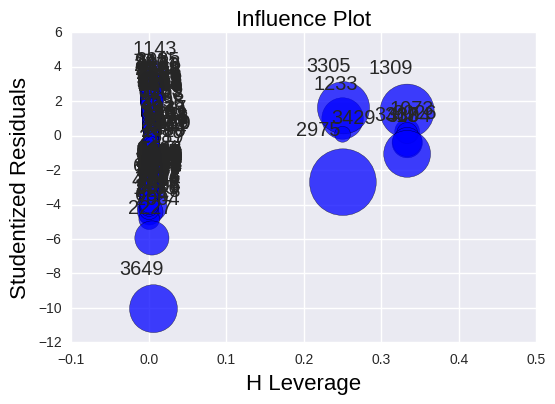

In [71]:
#Larger leverage, larger influence. If high residual and high leverage -> Probably affecting the model
from statsmodels.graphics.regressionplots import *
influence_plot(res)
plt.show()


In [80]:
df_merged.loc[3305].values

array(['US830480694', 439.0, 'TRUPANION, INCORPORATED', 2.5299999999999998,
       3, 'New York Stock Exchange (NYSE)', 'Insurance company', 70917.0,
       422381.0, 146963.0, 2.6424645202421213, 5.167208008772354,
       4.850750355369331, 5.6257043740599784], dtype=object)

In [81]:
df_merged.loc[2975].values

array(['US741339132', 15922.0, 'HRG GROUP INCORPORATED',
       6.5099999999999998, 3, 'New York Stock Exchange (NYSE)',
       'Insurance company', 32334100.0, 2769580.0, 5815900.0,
       4.2019976195831052, 6.7646169305501633, 7.5096607771287083,
       6.4424139143668908], dtype=object)

In [82]:
df_merged.loc[1309].values

array(['US271316416', 417.0, 'FOUNDATION MEDICINE, INC.',
       5.0799999999999992, 3, 'NASDAQ National Market',
       'Foundation/Research institute', 297989.0, 640148.0, 93203.0,
       2.6201360549737576, 4.9694298915651078, 5.474200232776008,
       5.8062803929723295], dtype=object)

The high leverage is in the groups without barely any members (Insurance companies, venture companies and research insitutes. We probably should drop those groups, but it's okay.